In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker

def gauss_function(x, a, x0, sigma):
    return a * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

In [ ]:
data = np.loadtxt('data/Langzeit_579474.388s.tka', delimiter=',', skiprows=2)
data = data / np.max(data)
channels = np.arange(2, len(data)+2)
max_channel = channels[np.argmax(data)]

def channel2Energie(c):
    return c * 5.4857 / max_channel;

energies = channel2Energie(channels)

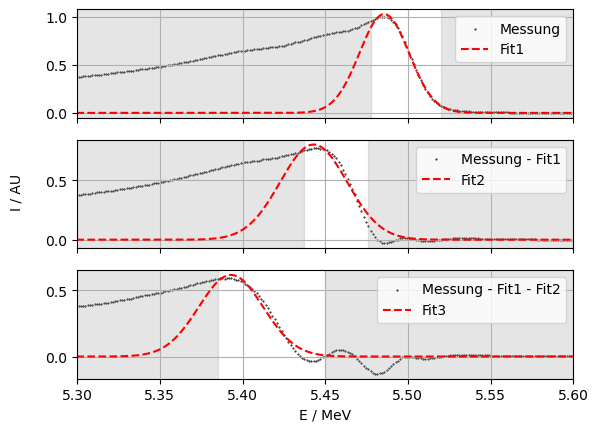

In [173]:
## fit MainPeak
def E2Index(E):
    return np.argmin(np.abs(energies-E))

def fit_main(x, a, sigma):
    return gauss_function(x, a, 5.4857, sigma)

p0 = (1, 0.01)

main_start = E2Index(5.478)
main_end = E2Index(5.52)

coeff1, _ =  curve_fit(fit_main, energies[main_start:main_end] ,data[main_start:main_end], p0=p0)

fig, (ax, ax1, ax2) = plt.subplots(3,1, sharex=True)
ax.set(xlim = [5.3, 5.6])
ax.grid()
ax.scatter(energies, data, 0.8, marker='.',  c="k", label="Messung")
ax.plot(energies, fit_main(energies, *coeff1), "r--", label="Fit1")

ax.axvspan(energies[main_start], energies[0], alpha=0.2, color='grey')
ax.axvspan(energies[main_end], energies[-1], alpha=0.2, color='grey')

ax1.grid()

ax1.scatter(energies, data - fit_main(energies, *coeff1), 0.8, marker='.',  c="k", label="Messung - Fit1")


main_start = E2Index(5.438)
main_end = E2Index(5.476)
def fit_2(x, a, sigma):
    return gauss_function(x, a, 5.443, sigma)
coeff2, _ =  curve_fit(fit_2, energies[main_start:main_end] ,data[main_start:main_end]  - fit_main(energies[main_start:main_end], *coeff1), p0=(0.8, 0.001))
ax1.plot(energies, fit_2(energies, *coeff2), "r--", label="Fit2")
ax1.axvspan(energies[main_start], energies[0], alpha=0.2, color='grey')
ax1.axvspan(energies[main_end], energies[-1], alpha=0.2, color='grey')


ax2.scatter(energies, data - fit_main(energies, *coeff1) - fit_2(energies, *coeff2), 0.8, marker='.',  c="k", label="Messung - Fit1 - Fit2")
ax2.grid()

main_start = E2Index(5.385)
main_end = E2Index(5.45)
def fit_3(x, a, sigma):
    return gauss_function(x, a, 5.393, sigma)

coeff3, _ =  curve_fit(fit_3, energies[main_start:main_end],
                       data[main_start:main_end]  - fit_main(energies[main_start:main_end], *coeff1) - fit_2(energies[main_start:main_end], *coeff2), p0=(0.8, 0.001))
ax2.plot(energies, fit_3(energies, *coeff3), "r--", label="Fit3")
ax2.axvspan(energies[main_start], energies[0], alpha=0.2, color='grey')
ax2.axvspan(energies[main_end], energies[-1], alpha=0.2, color='grey')

#ax2.plot(energies, data - fit_main(energies, *coeff1) - fit_2(energies, *coeff2) - fit_3(energies, *coeff3))


ax.legend()
ax1.legend()
ax2.legend()

ax2.set(xlabel="E / MeV")
fig.text(0.02, 0.5, 'I / AU', va='center', rotation='vertical')
fig.savefig("out/iter_gauß")

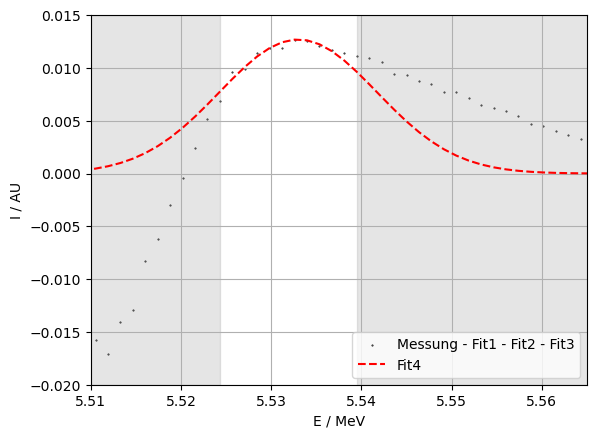

In [178]:
main_start = E2Index(5.525)
main_end = E2Index(5.54)

def fit_4(x, a, sigma):
    return gauss_function(x, a, 5.533, sigma)


coeff4, _ =  curve_fit(fit_4, energies[main_start:main_end], data[main_start:main_end] - fit_main(energies[main_start:main_end], *coeff1) - fit_2(energies[main_start:main_end], *coeff2) -fit_3(energies[main_start:main_end], *coeff3), p0=(0.8, 0.001))




fig2, ax3 = plt.subplots()
ax3.scatter(energies, data - fit_main(energies, *coeff1) - fit_2(energies, *coeff2) -fit_3(energies, *coeff3), 0.8, marker='.',  c="k",
         label="Messung - Fit1 - Fit2 - Fit3")


ax3.plot(energies, fit_4(energies, *coeff4), "r--", label="Fit4")
ax3.legend()

ax3.axvspan(energies[main_start], energies[0], alpha=0.2, color='grey')
ax3.axvspan(energies[main_end], energies[-1], alpha=0.2, color='grey')

ax3.set(xlim=[5.510, 5.535 + 0.03], ylim=[-0.02,0.0150])
ax3.grid()
ax3.set(xlabel="E / MeV", ylabel="I / AU")
fig2.savefig("out/iter_gauß2")

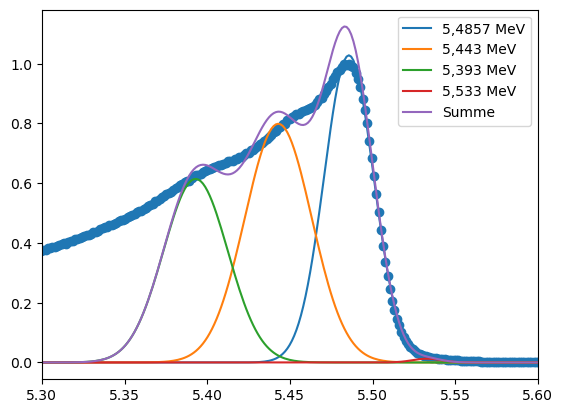

In [172]:
fig3, ax4 = plt.subplots()

ax4.plot(energies, fit_main(energies, *coeff1), label="5,4857 MeV")
ax4.plot(energies, fit_2(energies, *coeff2), label="5,443 MeV")
ax4.plot(energies, fit_3(energies, *coeff3), label="5,393 MeV")
ax4.plot(energies, fit_4(energies, *coeff4), label="5,533 MeV")

ax4.set(xlim=[5.3, 5.6])

ax4.plot(energies, fit_main(energies, *coeff1) + fit_2(energies, *coeff2) +  fit_3(energies, *coeff3) + fit_4(energies, *coeff4), label = "Summe")
ax4.scatter(energies, data)
ax4.legend()

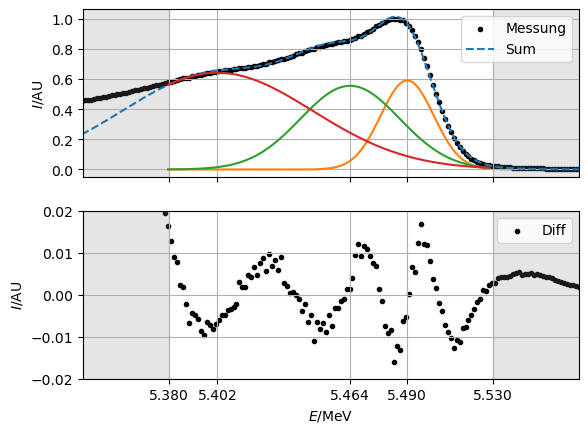

In [205]:
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)
ax.scatter(energies, data, marker='.', c='k', label="Messung")

#ax.stairs(data[0:-1], energies, color='k', alpha=0.5, label="Messung")
#ax.hist(data, bins=1000, label="Data")

def fit_function(E, E1, sigma1, a1, E2,  sigma2, a2, E3, sigma3, a3):
    return gauss_function(E, a1, E1, sigma1) +\
    gauss_function(E, a2, E2, sigma2) +\
    gauss_function(E, a3, E3, sigma3)


E_start = 5.38
E_end = 5.53

def E2Index(E):
    return np.argmin(np.abs(energies-E))

i_start = E2Index(E_start)
i_end = E2Index(E_end)

p0 = (5.4857,19e-3, 0.6, 5.443, 54e-3, 0.5, 5.388, 80e-3, 0.5)

coeff, _ = curve_fit(fit_function, energies[i_start:i_end], data[i_start:i_end], p0=p0)

ax.plot(energies, fit_function(energies, *coeff), linestyle='--', label="Sum")

ax.plot(energies[i_start:i_end], gauss_function(energies[i_start:i_end],coeff[2], coeff[0], coeff[1]))
ax.plot(energies[i_start:i_end], gauss_function(energies[i_start:i_end],coeff[5], coeff[3], coeff[4]))
ax.plot(energies[i_start:i_end], gauss_function(energies[i_start:i_end],coeff[8],  coeff[6], coeff[7]))


ax.set_xticks([coeff[0], coeff[3], coeff[6], E_end, E_start])
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
#ax.set(xlim=[5.54, 5.57], xlabel=r"$E / \mathrm{MeV}$", ylabel=r"$I / \mathrm{AU}$")
ax.set(xlim=[E_start - 0.04, E_end + 0.04], ylabel=r"$I / \mathrm{AU}$")
ax.axvspan(E_start, energies[0], alpha=0.2, color='grey')
ax.axvspan(E_end, energies[-1], alpha=0.2, color='grey')
ax.grid()
ax.legend()


ax2.scatter(energies, data - fit_function(energies, *coeff), marker='.', c='k', label="Diff")
ax2.axvspan(E_start, energies[0], alpha=.2, color='grey')
ax2.axvspan(E_end, energies[-1], alpha=.2, color='grey')
ax2.set(ylim=[-.02, .02], xlabel=r"$E / \mathrm{MeV}$", ylabel=r"$I / \mathrm{AU}$")
ax2.legend(loc=1)
ax2.grid()

fig.savefig('out/langzeit1.svg')
